In [10]:
import math, time, matplotlib.pyplot as plt

# Exercice 1: Implement newthon method in solving equation f(x) = 0

In [11]:
def methode_newton(f,f_,x0,tol,max_iter):
    newtonIter=[]
    newton=[]
    t = max_iter
    while max_iter>0 and abs(f(x0)) > tol:
        dx = -f(x0)/f_(x0)
        x0 = x0 + dx
        max_iter-=1
        newton.append(f(x0))
        newtonIter.append(t-max_iter)
    return x0, newton, newtonIter

# Exercice 2:

In [12]:
def f(x):
    return x**3-x+1
def f_(x):
    return 3*(x**2)-1
def f__(x):
    return 6*x

In [13]:
t,n,ni = methode_newton(f,f_,1,1e-8,1e6)
t, f(t)

(-1.3247179572453902, -2.7471358521324873e-12)

In [14]:
g = lambda x:math.sin(x) - 0.5
g_ = lambda x:math.cos(x)
g__ = lambda x: -math.sin(x)
r,n,ni = methode_newton(g,g_,-5,1e-8,1e6)
r, g(r)

(-5.759586534823978, -2.8082519643035653e-09)

In [15]:
h = lambda x:math.exp(x) - 2
h_ = lambda x:math.exp(x)
h__=lambda x:math.exp(x)
n,m,ni = methode_newton(h,h_,1,1e-8,1e6)
n, h(n)

(0.6931471805600254, 1.603162047558726e-13)

In [16]:
w = lambda x:x**5-4*x**4+3*x**3+2*x**2-7*x+10
w_ = lambda x:5*x**4-16*x**3+9*x**2-7
w__ = lambda x:20*x**3-48*x**2+18*x
m,n,ni = methode_newton(w,w_,4,1e-8,1e6)
m, w(m)

(2.853463239825629, -5.651607182244334e-09)

# Exercice 3: implement secant methon

In [17]:
def methode_secante(f,x0,x1,tol,max_iter):
    secante =[]
    secanteIter=[]
    t = max_iter
    while max_iter>0 and abs(f(x1)) > tol:
        dx = -f(x1)*(x1-x0)/(f(x1)-f(x0))
        x0=x1
        x1=x1+dx
        max_iter-=1
        secante.append(f(x1))
        secanteIter.append(t-max_iter)
    return x1, secante, secanteIter

In [19]:
d ,d1,d2= methode_secante(f,1,2,1e-8,1e6)
d, f(d)

(-1.3247179572435093, 5.274225500784269e-12)

In [26]:
e,e1,e2 = methode_secante(g,1,2,1e-8,1e6)
e, g(e)

(280035.8095544627, 1.217348444271238e-10)

In [27]:
r,r1,r2 = methode_secante(h,1,2,1e-8,1e6)
r, h(r)

(0.6931471806283026, 1.3671463960918118e-10)

In [28]:
k,k1,k2 = methode_secante(w,1,2,1e-8,1e6)
k, w(k)

(1.6456207266954914, 3.533351389251038e-10)

  # Exercice 4: Implement dichotomy method

In [34]:
def dichotomie(f,a,b,tol,max_iter):
    dicho=[]
    dichoIter=[]
    t = max_iter
    while abs(b-a) > tol and max_iter > 0:
        c = (a+b)/2
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
        max_iter -= 1
        dicho.append(f(b))
        dichoIter.append(t-max_iter)
    return (a+b)/2, dicho, dichoIter

In [35]:
o,d,di = dichotomie(f,-2,1,1e-6,1000)
o, f(o)

(-1.3247181177139282, -6.843422721836134e-07)

In [36]:
e,e1,e2 = dichotomie(g,0,1.5,1e-8,1e6)
e, g(e)

(0.5235987743362784, -1.0929417371130512e-09)

In [37]:
r,r1,r2 = dichotomie(h,0,3,1e-8,1e6)
r, h(r)

(0.6931471796706319, -1.778626801396399e-09)

In [38]:
k,k1,k2 = dichotomie(w,-3,1,1e-8,1e6)
k, w(k)

(-1.31405882909894, 4.1339095702142004e-08)

# Exercice 5: Compare convergence speed of these methods

In [51]:
n,newton,newtonIter = methode_newton(w, w_, 1, 1e-8, 1000)
s,secante,secanteIter = methode_secante(w, 1, 2, 1e-8, 1000)
d,dicho, dichoIter = dichotomie(w, -2, 1, 1e-8, 1000)
    

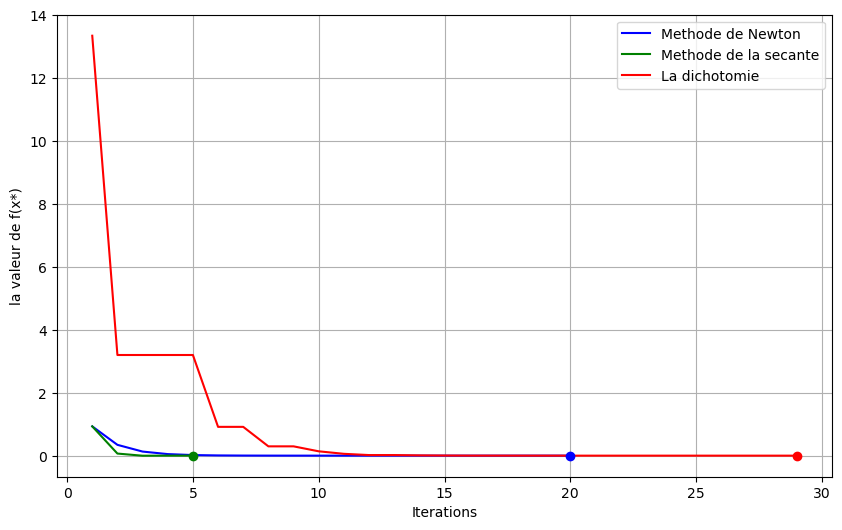

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(newtonIter, newton, label='Methode de Newton', color='b')
plt.plot(secanteIter, secante, label='Methode de la secante', color='g')
plt.plot(dichoIter, dicho, label='La dichotomie', color='r')
plt.scatter(newtonIter[-1], newton[-1], color='b', zorder=5)
plt.scatter(secanteIter[-1], secante[-1], color='g', zorder=5)  
plt.scatter(dichoIter[-1], dicho[-1], color='r', zorder=5)
plt.xlabel('Iterations')
plt.ylabel('la valeur de f(x*)')
plt.legend()
plt.grid(True)
plt.show()

# Exercice 6: Implement newton method without derivative

In [ ]:
# f(x) + Dxf'(x) + Dx^2 * f''(x)/2
def methode_newton2(f,f_,f__,x0,tol,max_iter):
    newton2=[]
    newton2Iter=[]
    t = max_iter
    while max_iter>0 and abs(f(x0))>tol:
        
        D = - f_(x0)**2 2*f(x0)*f__(x0)
        if D < 0 or f__(x0)==0:
            return methode_newton(f,f_,x0,tol,max_iter)
        else:
            Dx1 = (-f_(x0) - math.sqrt(D)) / f__(x0)
            Dx2 = (-f_(x0) + math.sqrt(D)) / f__(x0)
            x0 += Dx1 if f(x0 + Dx1) < f(x0 + Dx2) else Dx2
            newton2.append(f(x0))
            newton2Iter.append(t-max_iter)
        
        max_iter-=1
        if abs(Dx1) < tol and abs(Dx2) < tol:
            break
    return x0, newton2, newton2Iter

In [ ]:
n1,newton,newtonIter= methode_newton(w,w_,-1,1e-8,1000)
n2,newton2,newton2Iter = methode_newton2(w,w_,w__,-1,1e-8,1000)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(newtonIter, newton, label='Methode de Newton', color='b')
plt.plot(newton2Iter, newton2, label='Methode de Newton 2', color='y')
plt.scatter(newton2Iter[-1], newton2[-1], color='y', zorder=5, label="number of iteration (Newton 2)")  
plt.scatter(newtonIter[-1], newton[-1], color='b', zorder=5, label="number of iteration (Newton)")  
plt.xlabel('Iterations')
plt.ylabel('la valeur de f(x*)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# On calcule a 1e-6 pres la racine de l'equation 9/10 * exp(-x) - x =0 en utilisant la methode de point fixe

f = lambda x:9*math.exp(-x)/10
e = 1e-6
n = int(math.log2(e)/math.log2(0.9))+1
x0 = 0
for i in range(n):
    x0 = f(x0)
x0, f(x0) - x0

In [ ]:
g = lambda x:10*x-9*math.exp(-x)
g_ = lambda x:10 + 9*math.exp(-x)
r, l ,v = methode_newton(g,g_,0,1e-8,1000)
r,l,v

In [ ]:
h = lambda x: math.cos(x) - x
h_ = lambda x: -math.sin(x) - 1

a, m, l =methode_newton(h,h_,2,1e-10,20)
b, n, k =methode_secante(h,-2,2,1e-10,20)

a, b, l, k

In [44]:
t = lambda x:x**5-10*x**4+40*x**3-80*x**2+80*x-32
r,r1,r2 = dichotomie(t,1.3,3.2,1e-15,10000)
r, t(r)

(2.0013822354478106, 8.526512829121202e-14)

In [47]:
t = lambda x:(x-2)**5
r,r1,r2 = dichotomie(t,1.3,3.2,1e-15,100)
r, t(r)

(1.9999999999999998, -5.397605346934028e-79)